# Customer Churn Analysis

Project Description

Customer churn is when a company’s customers stop doing business with that company.
Businesses are very keen on measuring churn because keeping an existing customer is far less
expensive than acquiring a new customer. New business involves working leads through a sales
funnel, using marketing and sales budgets to gain additional customers. Existing customers will
often have a higher volume of service consumption and can generate additional customer
referrals.
Customer retention can be achieved with good customer service and products. But the most
effective way for a company to prevent attrition of customers is to truly know them. The vast
volumes of data collected about customers can be used to build churn prediction models.
Knowing who is most likely to defect means that a company can prioritise focused marketing
efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the
barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and
comparing several customer churn prediction models.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# GETTING THE DATASET

In [2]:
df=pd.read_csv('customer_churn_analysis.csv')
df.head()

,,niorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [3]:
df.shape

(7043, 19)

In [4]:
df.columns

Index(['niorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isnull().sum()

niorCitizen         0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes

niorCitizen           int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# REMOVING DUPLICATES

In [8]:
df['niorCitizen'].duplicated().sum()

7041

In [9]:
df['Partner'].duplicated().sum()

7041

In [10]:
df['Dependents'].duplicated().sum()

7041

In [11]:
df['tenure'].duplicated().sum()

6970

In [12]:
df['PhoneService'].duplicated().sum()

7041

In [13]:
df['MultipleLines'].duplicated().sum()

7040

In [14]:
df['InternetService'].duplicated().sum()

7040

In [15]:
df['OnlineSecurity'].duplicated().sum()

7040

In [16]:
df['OnlineBackup'].duplicated().sum()

7040

In [17]:
df['DeviceProtection'].duplicated().sum()

7040

In [18]:
df['TechSupport'].duplicated().sum()

7040

In [19]:
df['StreamingTV'].duplicated().sum()

7040

In [20]:
df['StreamingMovies'].duplicated().sum()

7040

In [21]:
df['Contract'].duplicated().sum()

7040

In [22]:
df['PaperlessBilling'].duplicated().sum()

7041

In [23]:
df['PaymentMethod'].duplicated().sum()

7039

In [24]:
df['MonthlyCharges'].duplicated().sum()

5458

In [25]:
df['TotalCharges'].duplicated().sum()

512

In [26]:
df['Churn'].duplicated().sum()

7041

In [27]:
df1=df.drop_duplicates()
df1.head()

,,niorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df1.duplicated().sum()

0

In [29]:
df1.shape

(7002, 19)

In [30]:
df1.head()

,,niorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df1.dtypes

niorCitizen           int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# CONVERTING OBJECT DATAS

In [32]:
from sklearn.preprocessing import OrdinalEncoder
ordin=OrdinalEncoder()

In [33]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=ordin.fit_transform(df1[i].values.reshape(-1,1))

In [34]:
df1.dtypes

niorCitizen           int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

# CONVERTING FLOAT DATAS

In [35]:
for i in df1.columns:
    if df1[i].dtypes=='float':
        df1[i]=df1[i].astype('int')    

In [36]:
df1.dtypes

niorCitizen         int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int32
TotalCharges        int32
Churn               int32
dtype: object

In [37]:
df1.isnull().sum()

niorCitizen         0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# DATA VISUALIZATION

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

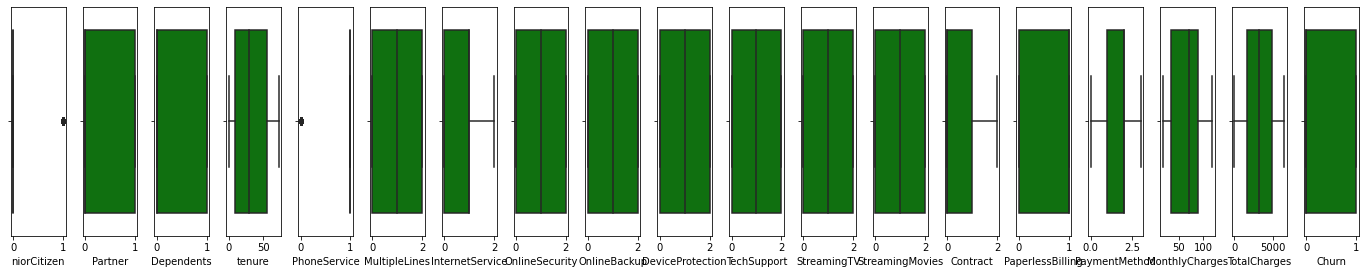

In [39]:
collist=df1.columns.values
ncol=50
nrows=40
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df1[collist[i]],color='green')
    plt.tight_layout()

THE ABOVE SHOWS THE COLUMNS DISTRIBUTION CLEARLY

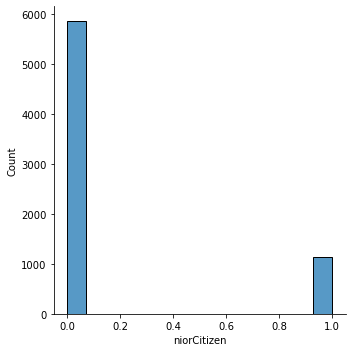

In [40]:
sns.displot(df1['niorCitizen'])

THE ABOVE GRAPH SHOWS THE DISTRIBUTION OF NIORCITIZEN COLUMN

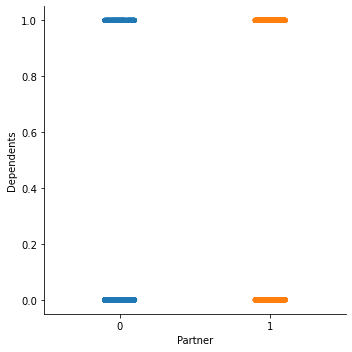

In [41]:
sns.catplot(x='Partner',y='Dependents',data=df1)

THE ABOVE COMPARES JOINTLY PARTNER AND DEPENDANTS

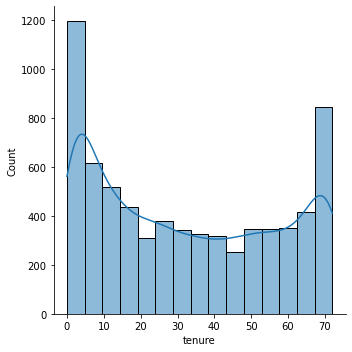

In [42]:
sns.displot(df1['tenure'],kde=True)

THE ABOVE GIVES THE DISTRIBUTION OF TENURE COLUMN

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

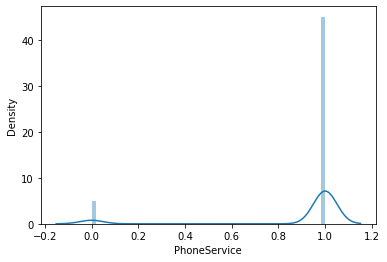

In [43]:
sns.distplot(df1['PhoneService'])

THE ABOVE SHOES THE DISTRIBUTION OF PHONE SERVICE

In [44]:
df1.shape

(7002, 19)

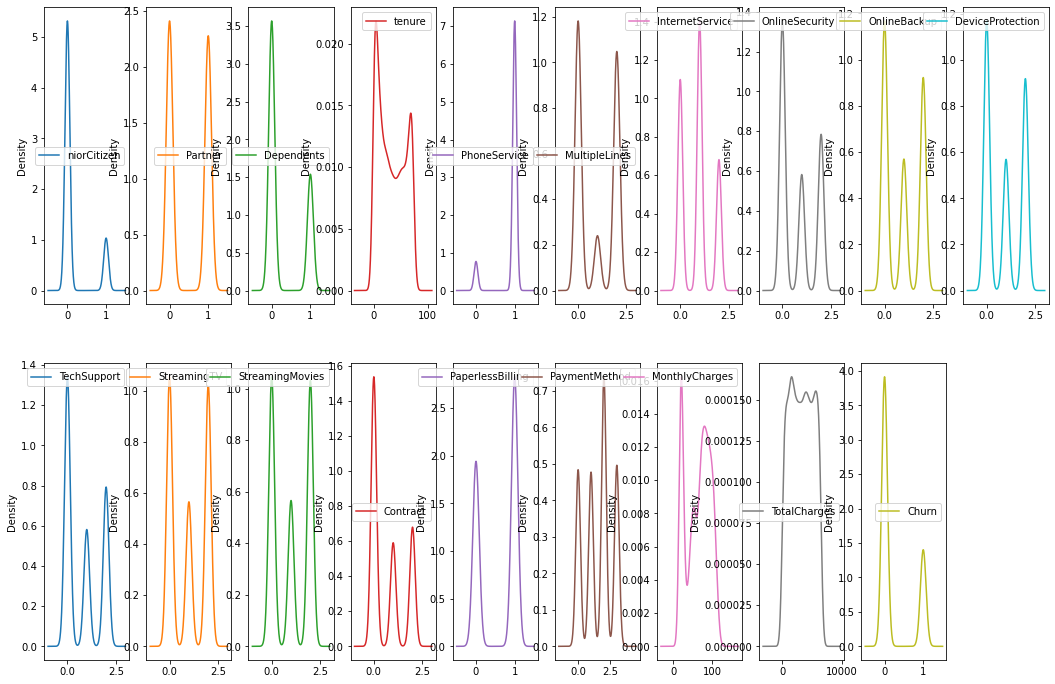

In [45]:
df1.plot(figsize=(18,12),kind='density',subplots=True,layout=(2,10),legend=True,sharex=False ) 
plt.show()

THE ABOVE SHOWS THE DENSITY OF ALL THE COLUMNS

<AxesSubplot:xlabel='Churn'>

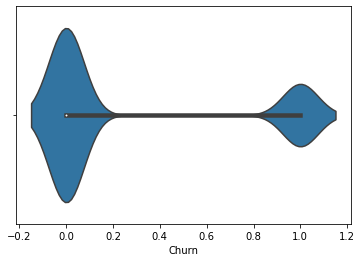

In [46]:
sns.violinplot(df1['Churn'])

THE ABOVE SHOWS THE DISTRIBUTION OF CHURN

<AxesSubplot:ylabel='Count'>

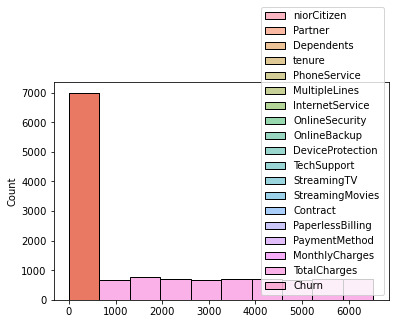

In [47]:
sns.histplot(data=df1,bins=10)

THE ABOVE SHOWS THE HIST DISTRIBUTION OF THE DATASET

# MORE EDA

In [48]:
df1.describe()

,niorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000
mean,0.162811,0.485861,0.301342,32.554841,0.902742,0.945873,0.869037,0.790774,0.907883,0.905884,0.797915,0.987289,0.994430,0.694516,0.592973,1.567838,64.478578,3261.346187,0.263782
std,0.369219,0.499836,0.458874,24.513327,0.296330,0.948652,0.736242,0.861539,0.881784,0.881573,0.863242,0.886493,0.886566,0.834512,0.491315,1.066847,30.044364,1889.530193,0.440714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.000000,1610.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.000000,3256.500000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.000000,4902.750000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.000000,6530.000000,1.000000


OBSERVATION:
    
    1)NIORCITIZEN,PARTNER,DEPENDANTS,TENURE,CONTRACT,TOTALCHARGES AND CHURN SHOW MEAN GREATER THAN MEDIAN SO THERE ARE LEFT SKEWED DATAS.
    
    2)PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINE SECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,PAPERLESSBILLING,MONTHLYCHARGES SHOW MEAN LESSER THAN MEDIAN SO THERE ARE RIGHT SKEWED DATAS.
    
    3)NIORCITIZEN,TENURE,INTERNETSERVICE,CINTRACT,PAYMENTMETHOD,MONTHLY CHARGES AND TOTAL CHARGES SHOWS DIFFERENCE IN THEIR 75% AND MAX SO THERE ARE OUTLIERS

In [49]:
df1.corr()

,niorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
niorCitizen,1.000000,0.014797,-0.212900,0.014353,0.008974,0.145057,-0.030320,-0.128192,-0.013595,-0.021374,-0.151306,0.030762,0.047279,-0.144520,0.155913,-0.036384,0.218607,0.036068,0.152114
Partner,0.014797,1.000000,0.450773,0.375287,0.019163,0.137707,0.006030,0.150518,0.152116,0.165379,0.126290,0.135790,0.127949,0.291501,-0.016458,-0.149945,0.091709,0.058052,-0.148090
Dependents,-0.212900,0.450773,1.000000,0.155760,-0.000825,-0.028807,0.048338,0.151916,0.090146,0.079652,0.133202,0.045584,0.019926,0.240801,-0.112884,-0.036512,-0.118564,-0.010842,-0.162859
tenure,0.014353,0.375287,0.155760,1.000000,0.010340,0.338375,-0.023864,0.326196,0.370944,0.371190,0.323597,0.288346,0.295830,0.669960,0.004226,-0.365913,0.242412,0.157261,-0.351002
PhoneService,0.008974,0.019163,-0.000825,0.010340,1.000000,-0.018729,0.387462,-0.015376,0.024199,0.003777,-0.019331,0.055648,0.044152,0.003446,0.016497,-0.005558,0.249990,0.083789,0.010538
MultipleLines,0.145057,0.137707,-0.028807,0.338375,-0.018729,1.000000,-0.104634,0.006415,0.116298,0.121321,0.010711,0.173785,0.179664,0.106672,0.164795,-0.172153,0.431023,0.113788,0.042013
InternetService,-0.030320,0.006030,0.048338,-0.023864,0.387462,-0.104634,1.000000,-0.030594,0.035099,0.043947,-0.028163,0.107311,0.098231,0.104819,-0.136723,0.080325,-0.318208,-0.051020,-0.048033
OnlineSecurity,-0.128192,0.150518,0.151916,0.326196,-0.015376,0.006415,-0.030594,1.000000,0.183516,0.174358,0.283659,0.042712,0.054015,0.374784,-0.157012,-0.097146,-0.053041,0.044787,-0.288373
OnlineBackup,-0.013595,0.152116,0.090146,0.370944,0.024199,0.116298,0.035099,0.183516,1.000000,0.186006,0.194151,0.145232,0.134733,0.280480,-0.012374,-0.124619,0.120618,0.093061,-0.193650
DeviceProtection,-0.021374,0.165379,0.079652,0.371190,0.003777,0.121321,0.043947,0.174358,0.186006,1.000000,0.239089,0.275001,0.287169,0.350001,-0.037341,-0.135591,0.164797,0.108268,-0.176162


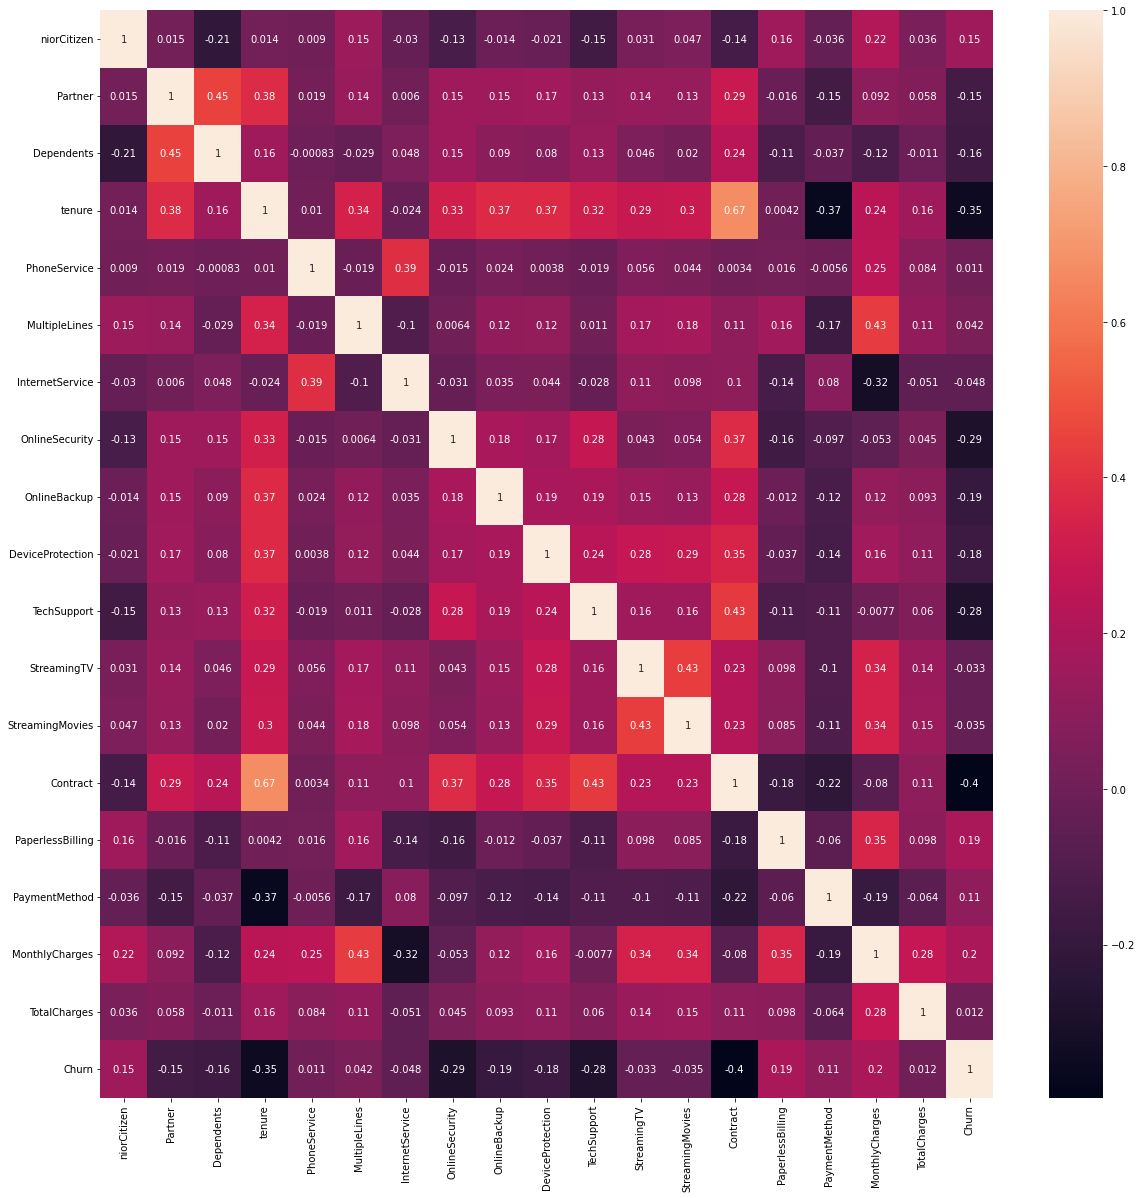

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

OUTLIERS AND SKEW IS PRESENT

In [51]:
df1.skew()

niorCitizen         1.827022
Partner             0.056590
Dependents          0.866095
tenure              0.232097
PhoneService       -2.718978
MultipleLines       0.107978
InternetService     0.211122
OnlineSecurity      0.415768
OnlineBackup        0.180217
DeviceProtection    0.184158
TechSupport         0.401052
StreamingTV         0.024777
StreamingMovies     0.010857
Contract            0.621709
PaperlessBilling   -0.378576
PaymentMethod      -0.163333
MonthlyCharges     -0.227593
TotalCharges        0.011041
Churn               1.072286
dtype: float64

SKEW IS REMOVED

# REMOVING OUTLIERS

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

In [53]:
dfnew=df1[(z<3).all(axis=1)]
dfnew.head()

,,niorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1466,0
3668-QPYBK,Male,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,157,1
9237-HQITU,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,925,1
9305-CDSKC,Female,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99,6104,1
1452-KIOVK,Male,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89,1550,0


In [54]:
dfnew.skew()

niorCitizen         1.816299
Partner             0.044001
Dependents          0.866759
tenure              0.229903
PhoneService        0.000000
MultipleLines       0.120162
InternetService     0.054521
OnlineSecurity      0.421085
OnlineBackup        0.165138
DeviceProtection    0.180591
TechSupport         0.408796
StreamingTV        -0.006733
StreamingMovies    -0.014078
Contract            0.619703
PaperlessBilling   -0.389822
PaymentMethod      -0.162563
MonthlyCharges     -0.408619
TotalCharges       -0.047102
Churn               1.063428
dtype: float64

# SPLITTING X AND Y

In [55]:
x=dfnew.drop('Churn',axis=1)
y=dfnew['Churn']

# BALANCING X AND Y

In [56]:
from sklearn.preprocessing import power_transform

In [57]:
newx=power_transform(x)
dfx=pd.DataFrame(data=newx,columns=x.columns)
dfx.head()

,niorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.442749,-0.978246,-0.656553,0.282557,-1.776357e-15,-0.941735,-1.396201,1.271687,-1.103408,1.173608,-0.996125,-1.185668,-1.189292,0.778945,-1.213674,1.325084,-0.398958,-0.915199
1,-0.442749,-0.978246,-0.656553,-1.511888,-1.776357e-15,-0.941735,-1.396201,1.271687,1.167359,-1.096267,-0.996125,-1.185668,-1.189292,-0.893348,0.823944,1.325084,-0.497137,-1.926575
2,-0.442749,-0.978246,-0.656553,-1.511888,-1.776357e-15,-0.941735,0.109064,-0.991022,-1.103408,-1.096267,-0.996125,-1.185668,-1.189292,-0.893348,0.823944,0.419350,0.068090,-1.272205
3,-0.442749,-0.978246,-0.656553,-0.946102,-1.776357e-15,1.061869,0.109064,-0.991022,-1.103408,1.173608,-0.996125,1.098836,1.095957,-0.893348,0.823944,0.419350,1.074157,1.353746
4,-0.442749,-0.978246,1.523106,-0.180813,-1.776357e-15,1.061869,0.109064,-0.991022,1.167359,-1.096267,-0.996125,1.098836,-1.189292,-0.893348,0.823944,-0.512204,0.722040,-0.863410


In [58]:
dfx.shape

(6321, 18)

In [59]:
y.value_counts()

0    4644
1    1677
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

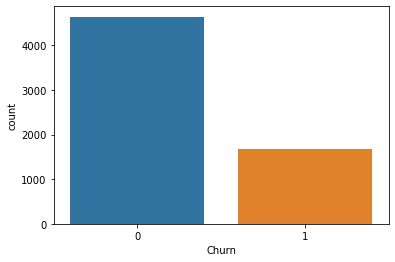

In [60]:
sns.countplot(y)

In [61]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xnew,ynew=smt.fit_resample(dfx,y)

In [62]:
ynew.value_counts()

0    4644
1    4644
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

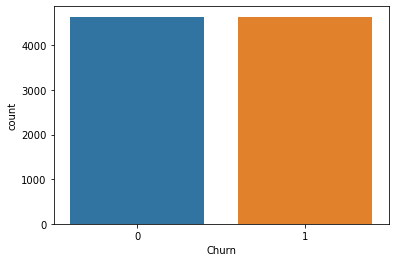

In [63]:
sns.countplot(ynew)

# TRAINING AND TESTING

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
maxAcc=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=accuracy_score(y_test,predlr)
    print('Accuracy_score of LogisticRegression ' ,score, 'at random_state ' ,i)
    if score > maxAcc:
        maxAcc=score
        maxRS=i
    print('Mac acc score of lr ' ,maxAcc*100, 'at random_state ' ,maxRS) 

Accuracy_score of LogisticRegression  0.7739504843918191 at random_state  0
Mac acc score of lr  77.3950484391819 at random_state  0
Accuracy_score of LogisticRegression  0.7755651237890204 at random_state  1
Mac acc score of lr  77.55651237890204 at random_state  1
Accuracy_score of LogisticRegression  0.7804090419806243 at random_state  2
Mac acc score of lr  78.04090419806244 at random_state  2
Accuracy_score of LogisticRegression  0.7841765339074274 at random_state  3
Mac acc score of lr  78.41765339074274 at random_state  3
Accuracy_score of LogisticRegression  0.7890204520990313 at random_state  4
Mac acc score of lr  78.90204520990312 at random_state  4
Accuracy_score of LogisticRegression  0.7836383207750269 at random_state  5
Mac acc score of lr  78.90204520990312 at random_state  4
Accuracy_score of LogisticRegression  0.7771797631862217 at random_state  6
Mac acc score of lr  78.90204520990312 at random_state  4
Accuracy_score of LogisticRegression  0.7594187298170075 at ran

In [66]:
x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=237)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
score=accuracy_score(predlr,y_test)
print('Accuracy_score of LogisticRegression ' ,score*100)
print(confusion_matrix(predlr,y_test))
print(classification_report(predlr,y_test))

Accuracy_score of LogisticRegression  81.0010764262648
[[723 150]
 [203 782]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       873
           1       0.84      0.79      0.82       985

    accuracy                           0.81      1858
   macro avg       0.81      0.81      0.81      1858
weighted avg       0.81      0.81      0.81      1858



# TUNING LOGISTIC REGRESSION

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
lr=LogisticRegression()
parameters={'C':[100,10,1,0.1,0.01]}
gscvlr=GridSearchCV(estimator=lr,param_grid=parameters)
gscvlr.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01]})

In [69]:
print(gscvlr.best_params_)

{'C': 1}


In [70]:
lr1=LogisticRegression(C=1)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  81.0010764262648


SINCE LOGISTIC REGRESSION SHOWS LOW RESULT ,WE CAN TEST MORE MODELS 

# TESTING MORE MODELS

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [72]:
model=[knc,gbc,abc,etc,rfc,dtc,svc]
for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy_score of model ' , i ,'is = ' ,accuracy_score(y_test,predi)*100)

Accuracy_score of model  KNeighborsClassifier() is =  79.54790096878364
Accuracy_score of model  GradientBoostingClassifier() is =  85.30678148546824
Accuracy_score of model  AdaBoostClassifier() is =  83.53067814854683
Accuracy_score of model  ExtraTreesClassifier() is =  87.62109795479009
Accuracy_score of model  RandomForestClassifier() is =  87.19052744886974
Accuracy_score of model  DecisionTreeClassifier() is =  80.83961248654468
Accuracy_score of model  SVC() is =  82.61571582346609


# CROSS-VALIDATION

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
 for i in range(2,10):
        models=[knc,gbc,abc,etc,rfc,dtc,svc]
        for j in models:
            j.fit(x_train,y_train)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train,y_train,cv=i)
    
            print('Accuracy_score of model ' ,j, 'is equal == ' ,score*100)
            print('Cross validation of model ' ,j, 'is equal == ' ,cross.mean(),'at cv = ' ,i)
            print('Diff between accuracy_score and cross validation of model ' ,j, 'is equal == ' , score-(cross.mean()))

Accuracy_score of model  KNeighborsClassifier() is equal ==  79.54790096878364
Cross validation of model  KNeighborsClassifier() is equal ==  0.7592193808882908 at cv =  2
Diff between accuracy_score and cross validation of model  KNeighborsClassifier() is equal ==  0.036259628799545585
Accuracy_score of model  GradientBoostingClassifier() is equal ==  85.30678148546824
Cross validation of model  GradientBoostingClassifier() is equal ==  0.8314939434724091 at cv =  2
Diff between accuracy_score and cross validation of model  GradientBoostingClassifier() is equal ==  0.02157387138227329
Accuracy_score of model  AdaBoostClassifier() is equal ==  83.53067814854683
Cross validation of model  AdaBoostClassifier() is equal ==  0.8071332436069987 at cv =  2
Diff between accuracy_score and cross validation of model  AdaBoostClassifier() is equal ==  0.028173537878469546
Accuracy_score of model  ExtraTreesClassifier() is equal ==  88.15931108719053
Cross validation of model  ExtraTreesClassifie

# HYPERTUNING

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_etc=GridSearchCV(estimator=etc,param_grid=parameters)
gscv_etc.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [77]:
print(gscv_etc.best_score_)
print(gscv_etc.best_params_)
print(gscv_etc.best_estimator_)

0.7598923283983849
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 150}
ExtraTreesClassifier(max_depth=3, max_features='auto', n_estimators=150)


In [78]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_rfc=GridSearchCV(estimator=rfc,param_grid=parameters)
gscv_rfc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [79]:
print(gscv_rfc.best_score_)
print(gscv_rfc.best_params_)
print(gscv_rfc.best_estimator_)

0.7709286675639302
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}
RandomForestClassifier(max_depth=3, max_features='log2')


In [80]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_gbc=GridSearchCV(estimator=gbc,param_grid=parameters)
gscv_gbc.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [81]:
print(gscv_gbc.best_score_)
print(gscv_gbc.best_params_)
print(gscv_gbc.best_estimator_)

0.8434724091520861
{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}
GradientBoostingClassifier(criterion='squared_error', max_features='auto',
                           n_estimators=200)


In [82]:
svc=SVC()
kernel_value={'kernel':['rbf','linear','poly']}

In [83]:
gscv_svc=GridSearchCV(estimator=svc,param_grid=kernel_value)
gscv_svc.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [84]:
print(gscv_svc.best_score_)
print(gscv_svc.best_estimator_)
print(gscv_svc.best_params_)

0.799192462987887
SVC()
{'kernel': 'rbf'}


# ROC-CURVE

In [85]:
from sklearn.metrics import roc_curve

In [87]:
fpr,tpr,thresholds=roc_curve(y_test,rfc.predict(x_test))

In [88]:
fpr

array([0.        , 0.12095032, 1.        ])

In [89]:
tpr

array([0.        , 0.88412017, 1.        ])

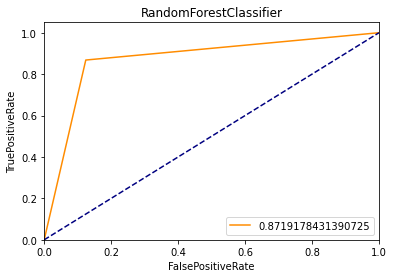

In [90]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,rfc.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',label=roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

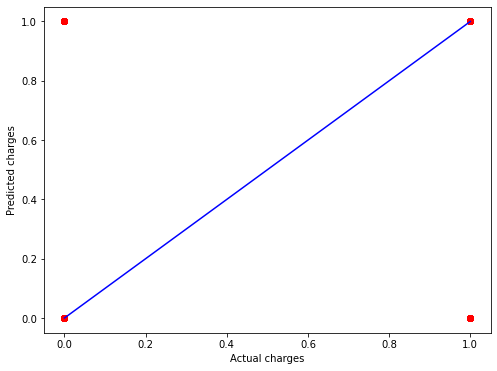

In [91]:
plt.figure(figsize=(8,6))
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.scatter(x=y_test,y=rfc.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.savefig('=rfc.png')
plt.show()

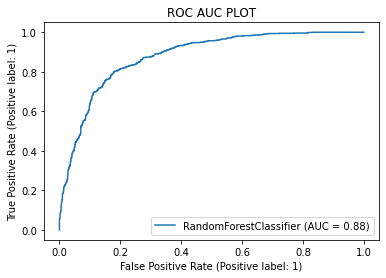

In [92]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv_rfc.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

# SINCE RANDOM FOREST CLASSIFIER SHOWS BEST HIGH SCORE SO FAR WE CONSIDER IT AS THE BEST FITTED MODEL

In [93]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
score=accuracy_score(y_test,predrfc)
print('ACCURACY_SCORE OF THE BEST FITTED MODEL --RANDOM FOREST CLASSIFIER',score*100)
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

ACCURACY_SCORE OF THE BEST FITTED MODEL --RANDOM FOREST CLASSIFIER 87.08288482238966
[[813 113]
 [127 805]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       926
           1       0.88      0.86      0.87       932

    accuracy                           0.87      1858
   macro avg       0.87      0.87      0.87      1858
weighted avg       0.87      0.87      0.87      1858



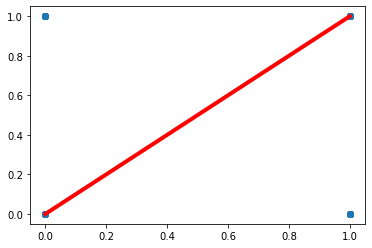

In [94]:
plt.scatter(predrfc,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# FINAL COMPARISON OF ALL MODELS 

In [95]:
from sklearn.metrics import roc_curve,plot_roc_curve

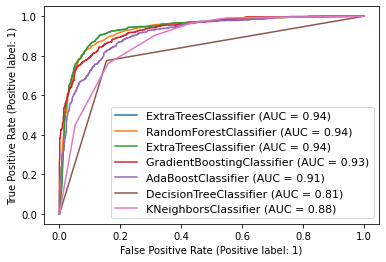

In [96]:
disp=plot_roc_curve(etc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(etc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

# SAVING THE BEST MODEL

In [97]:
import pickle
filename='customer_churn_analysis.pkl'

In [98]:
pickle.dump(rfc,open(filename,'wb'))

# LOADING THE SAVED MODEL

In [99]:
pickle.load(open(filename,'rb'))

RandomForestClassifier()